In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from d2l import torch as d2l
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


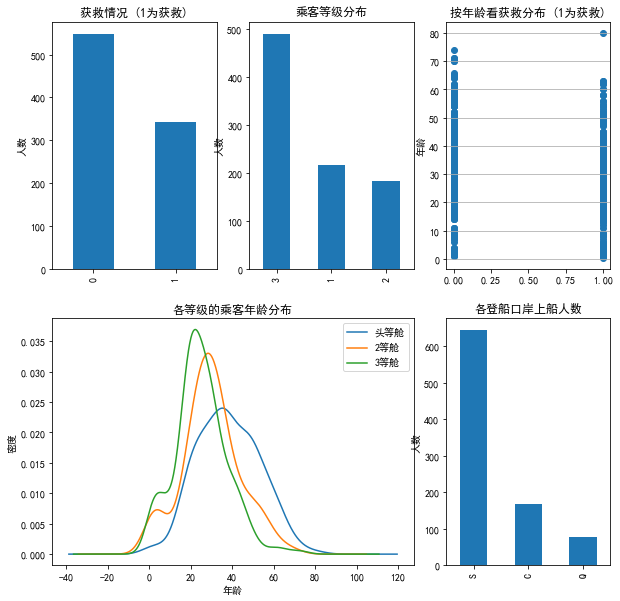

In [6]:
fig = plt.figure(figsize=(10,10))
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
train.Survived.value_counts().plot(kind='bar')# 柱状图
plt.title(u'获救情况 (1为获救)') # 标题
plt.ylabel(u"人数")

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"人数")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.ylabel(u"年龄")                         # 设定纵坐标名称
plt.grid(b=True, which='major', axis='y')
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")
plt.show()


<Figure size 432x288 with 0 Axes>

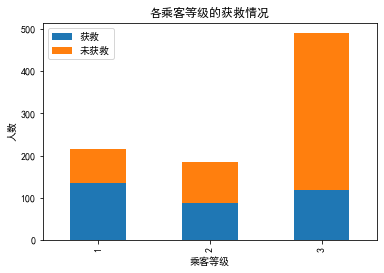

In [7]:
#看看各乘客等级的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 
plt.show()


<Figure size 432x288 with 0 Axes>

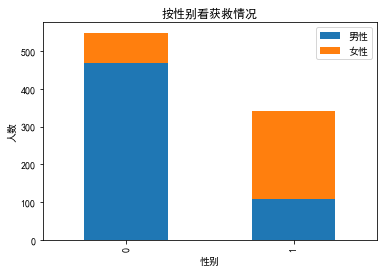

In [8]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = train.Survived[train.Sex == 'male'].value_counts()
Survived_f = train.Survived[train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()


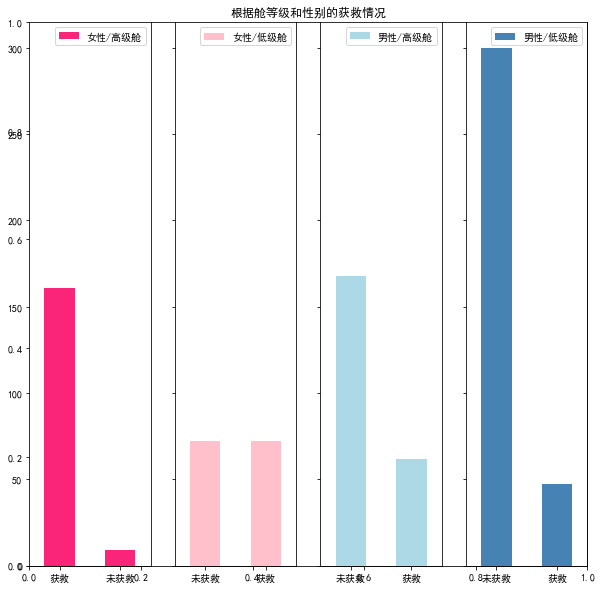

In [9]:

 #然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure(figsize=(10,10))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

<Figure size 432x288 with 0 Axes>

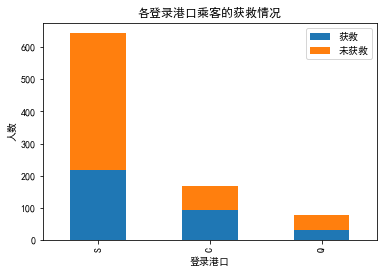

In [10]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()


In [11]:

g = train.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)

g = train.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
print(df)



                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


In [12]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，先不纳入考虑的特征范畴把
#cabin只有204个乘客有值，我们先看看它的一个分布
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<Figure size 432x288 with 0 Axes>

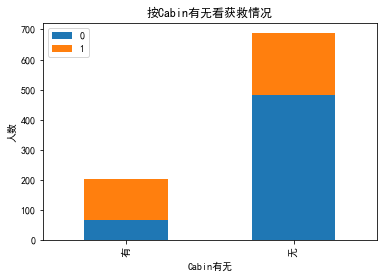

In [13]:

fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_nocabin = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()



In [14]:

from sklearn.ensemble import RandomForestRegressor
 
### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
   
    unknown_age = age_df[age_df.Age.isnull()].values



    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1:]

    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)


# test, rfr = set_missing_ages(test)
# test = set_Cabin_type(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:

dummies_Cabin = pd.get_dummies(train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
dummies_Embarked


,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [370]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,-0.561377,1,0,-0.502445,1,0,0,0,1,0,1,0,0,1
1,2,1,0.613173,1,0,0.786845,0,1,1,0,0,1,0,1,0,0
2,3,1,-0.267740,0,0,-0.488854,1,0,0,0,1,1,0,0,0,1
3,4,1,0.392945,1,0,0.420730,0,1,0,0,1,1,0,1,0,0
4,5,0,0.392945,0,0,-0.486337,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,-0.194330,0,0,-0.386671,1,0,0,0,1,0,1,0,1,0
887,888,1,-0.781606,0,0,-0.044381,0,1,0,0,1,1,0,1,0,0
888,889,0,-0.988244,1,2,-0.176263,1,0,0,0,1,1,0,0,0,1
889,890,1,-0.267740,0,0,-0.044381,0,1,1,0,0,0,1,1,0,0


In [371]:
df.shape

(891, 16)

In [391]:
y = df.iloc[:,1].values
X = df.iloc[:,2:].values

In [286]:
model_DT = tree.DecisionTreeClassifier(random_state=1)
model_KNN = neighbors.KNeighborsClassifier()
model_RFR = ensemble.RandomForestClassifier(random_state=30,n_jobs=-1)
#Adaboot回归
model_ABR = ensemble.AdaBoostClassifier(random_state=70)
#GBRT回归
model_GBR = ensemble.GradientBoostingClassifier(random_state=8)
#criterion='friedman_mse',learning_rate=1,max_depth=1,max_features='log2',min_samples_leaf=1,subsample=0.5,loss='ls',
#Bagging回归
model_BR = ensemble.BaggingClassifier(random_state=7)
#ExtraTree极端随机树回归
model_ETR = tree.ExtraTreeClassifier(random_state=33)

In [256]:
scores = cross_val_score(model_DT,X,y,cv=5)
print(np.mean(scores))

0.7800577490427469


In [257]:
scores = cross_val_score(model_KNN,X,y,cv=5)
print(np.mean(scores))

0.8080848659845584


In [258]:
scores = cross_val_score(model_ABR,X,y,cv=5)
print(np.mean(scores))

0.8036532546607245


In [298]:
scores = cross_val_score(model_RFR,X,y,cv=5)
print(np.mean(scores))

0.8058690603226413


In [259]:
scores = cross_val_score(model_GBR,X,y,cv=5)
print(np.mean(scores))

0.8283158621555458


In [260]:
scores = cross_val_score(model_BR,X,y,cv=5)
print(np.mean(scores))

0.80921473856004


In [261]:
scores = cross_val_score(model_ETR,X,y,cv=5)
print(np.mean(scores))

0.7822672776348001


In [262]:
estimators=[('knn',model_KNN),('abr',model_ABR)]
stack =StackingClassifier(estimators=estimators,final_estimator=model_GBR)
# scores = cross_val_score(stack,X,y,cv=5)
# print(np.mean(scores))

0.7980101688531793


In [263]:

data_test = pd.read_csv("test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test



,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,0.307526,0,0,-0.496637,1,0,0,1,0,0,1,0,0,1
1,893,1.256242,1,0,-0.511497,1,0,0,0,1,1,0,0,0,1
2,894,2.394702,0,0,-0.463335,1,0,0,1,0,0,1,0,1,0
3,895,-0.261704,0,0,-0.481704,1,0,0,0,1,0,1,0,0,1
4,896,-0.641190,1,1,-0.416740,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.019551,0,0,-0.492680,1,0,0,0,1,0,1,0,0,1
414,1306,0.649064,0,0,1.314641,0,1,1,0,0,1,0,1,0,0
415,1307,0.611115,0,0,-0.507017,1,0,0,0,1,0,1,0,0,1
416,1308,0.019551,0,0,-0.492680,1,0,0,0,1,0,1,0,0,1


In [287]:
X.shape

(891, 14)

In [296]:
# x_test = df_test.iloc[:,1:].values
# # model_GBR.fit(X,y)
# # pre = model_GBR.predict(x_test)
# model_KNN.fit(X,y)
# pre = model_KNN.predict(x_test)
# result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':pre.astype(np.int32)})
# result.to_csv("GBRpredictions.csv", index=False)
def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, # 要搜索的模型
                        params, # 要尝试的参数,
                        n_jobs=6,
                        error_score=0.) # 如果报错，结果是0
    grid.fit(X, y) # 拟合模型和参数
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_))
    # 拟合的平均时间（秒）
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # 预测的平均时间（秒）
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [297]:
rfr_param={"n_estimators" : [10,100,200, 300,400,600,1000]}
get_best_model_and_accuracy(model_RFR,rfr_param,X,y)

Best Accuracy: 0.8125792480070304
Best Parameters: {'n_estimators': 1000}
Average Time to Fit (s): 0.529
Average Time to Score (s): 0.056


In [299]:
gbr_param={"n_estimators" : [10,100,200, 300,400,600,1000]}
get_best_model_and_accuracy(model_GBR,rfr_param,X,y)

Best Accuracy: 0.8372983491306257
Best Parameters: {'n_estimators': 200}
Average Time to Fit (s): 0.282
Average Time to Score (s): 0.001


In [302]:
model_GBR2 = ensemble.GradientBoostingClassifier(random_state=11,n_estimators=200)
scores = cross_val_score(model_GBR2,X,y,cv=5)
print(np.mean(scores))

0.835044881049526


In [408]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
test_dataset = TensorDataset(torch.tensor(X_test,dtype=torch.float32),torch.tensor(y_test,dtype=torch.float32))
testloader = DataLoader(test_dataset, batch_size=4,shuffle=False, num_workers=2)
train_dataset = TensorDataset(torch.tensor(X_train,dtype=torch.float32),torch.tensor(y_train,dtype=torch.float32))
trainloader = DataLoader(train_dataset, batch_size=4,shuffle=True, num_workers=2)



# 定义模型
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(X.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Linear(16, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.fc(x)


net = Net()

In [409]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用 GPU 在数据集上计算模型的准确度。"""
    if isinstance(net, nn.Module):
        net.eval()  # 将模型设置为评估模式
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)

    with torch.no_grad():
        for X, y in data_iter:
            if isinstance(X, list):
                # BERT 微调所需
                X = [x.to(device) for x in X]
            else:
                X = X.to(device)
            y = y.to(device)
            metric.add(d2l.accuracy(net(X), y), d2l.size(y))
    return metric[0] / metric[1]
def train(net, train_iter,num_epochs,device = None):
    """训练并保存模型"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters())

#     optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失总和、训练准确率总和、示例数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X= X.to(device)
            y = y.to(device)

#             X = X.cuda()
#             y = y.cuda()
#             print(X.device,y.device)
#             y_hat,test = net(X.to(device))
#             y_hat = y_hat.to(device)
            y_hat = net(X)
            l = loss(y_hat, y.long())
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
    torch.save(net,r'train.pth')
def train_test(net, train_iter, test_iter, num_epochs,device = None):
    """训练并测试参数"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters())

#     optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        # 训练损失总和、训练准确率总和、示例数
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X= X.to(device)
            y = y.to(device)

#             X = X.cuda()
#             y = y.cuda()
#             print(X.device,y.device)
#             y_hat,test = net(X.to(device))
#             y_hat = y_hat.to(device)
            y_hat = net(X)
            l = loss(y_hat, y.long())
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))

        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.427, train acc 0.884, test acc 0.769
1109.0 examples/sec on cuda:0


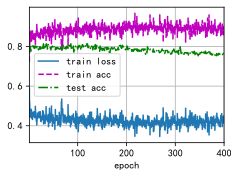

In [410]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
num_epochs=1
train_test(net,trainloader,testloader,num_epochs,device)